In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model

import utils

In [2]:
def load_dataset_up_down(size, seed=123):
    np.random.seed(seed)
    # Generación de valores aleatorios
    x1 = np.random.poisson(5, size)
    x1 *= np.random.randint(0, 2, size) * 2 - 1
    x2 = np.random.poisson(5, size) + 1
    x2 *= np.random.randint(0, 2, size) * 2 - 1
    # Valores (x1, x2)
    X = np.array(list(zip(x1, x2)))
    # Si x2 > 0, entonces pertenece a categoría 1
    # Si x2 < 0, entonces pertenece a categoría 0
    Y = (X[:, 1] > 0).astype(np.int8)
    return X, Y

# The Perceptron

## Training with 100 points

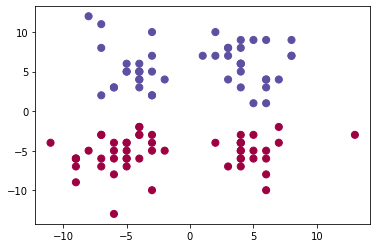

In [3]:
X, Y = load_dataset_up_down(100)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

Accuracy: 100.0


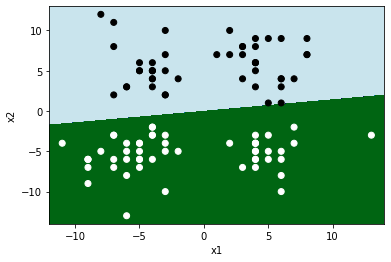

In [4]:
clf = sklearn.linear_model.Perceptron(max_iter=10, random_state=1)
clf.fit(X, Y)

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')

## Testing with more and more data

Accuracy: 99.9


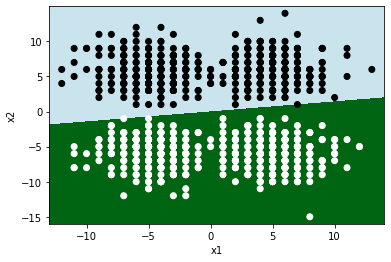

In [5]:
X, Y = load_dataset_up_down(1000)

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')

## Do you see a problem?

It did not generalize well.

## What if we train again (and again...)

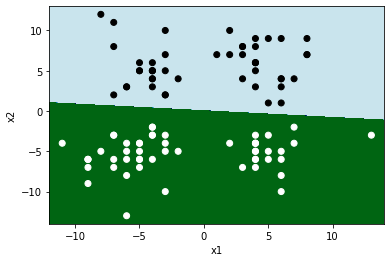

In [6]:
X, Y = load_dataset_up_down(100)

clf = sklearn.linear_model.Perceptron(max_iter=10, random_state=10)
clf.fit(X, Y)

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

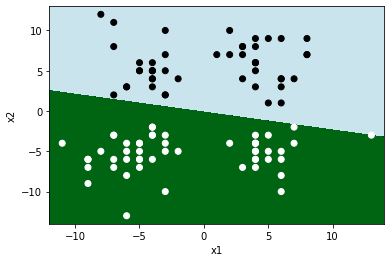

In [7]:
X, Y = load_dataset_up_down(100)

clf = sklearn.linear_model.Perceptron(max_iter=10, random_state=100)
clf.fit(X, Y)

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

## What is the problem? How could we fix it?

We want the *maximum-margin hyperplane*.

# And if data is not linearly separable?

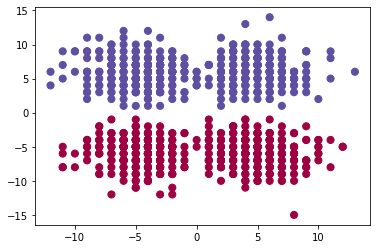

In [8]:
X, Y = load_dataset_up_down(1000)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

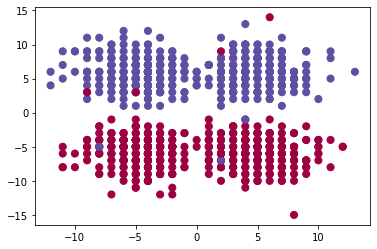

In [9]:
some_noise = np.random.binomial(1, 0.01, Y.shape[0])

Y = np.logical_xor(Y, some_noise).astype(np.int8)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

Accuracy: 99.0


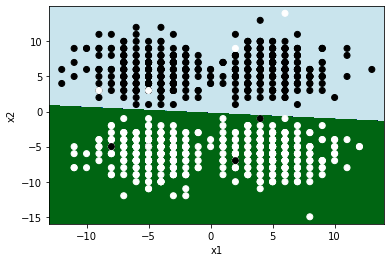

In [10]:
clf = sklearn.linear_model.Perceptron(shuffle=False, max_iter=10, random_state=1)
clf.fit(X, Y);

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')

Accuracy: 99.0


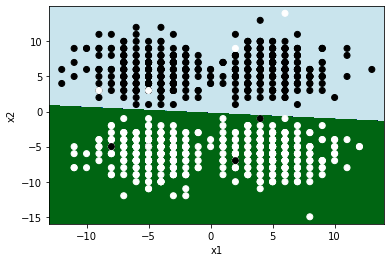

In [11]:
clf = sklearn.linear_model.Perceptron(shuffle=False, max_iter=100, random_state=10)
clf.fit(X, Y);

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')